In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('data/dataset_processed.csv')
data_encoded = pd.get_dummies(data)


data_encoded['target_class'] = pd.qcut(data_encoded['Cs'], q=10, labels=False)
X = data_encoded.drop(['Cs', 'target_class'], axis=1)
y = data_encoded['Cs']
stratify_column = data_encoded['target_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=stratify_column)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

X_train, X_test, y_train, y_test

(         O     N     B    S    P      SSA     PV       Mic       Dap  ID/IG  \
 484  15.55  2.61  0.00  0.0  0.0  3139.20  1.740  0.557471  2.217125  1.020   
 145   7.71  0.00  0.00  0.0  0.0   804.00  0.315  0.621891  1.567164  0.970   
 491  15.55  2.61  0.00  0.0  0.0  3139.20  1.740  0.557471  2.217125  1.020   
 463   8.35  2.41  0.00  0.0  0.0  2511.00  2.170  0.437788  3.456790  2.070   
 216   4.89  1.74  0.00  0.0  0.0  1666.80  2.420  0.119835  5.807535  0.880   
 ..     ...   ...   ...  ...  ...      ...    ...       ...       ...    ...   
 460   8.35  2.41  0.00  0.0  0.0  2511.00  2.170  0.437788  3.456790  2.070   
 224   6.42  2.75  0.00  0.0  0.0  1301.60  3.040  0.069079  9.342348  0.920   
 375   3.37  0.00  0.00  0.0  0.0  3252.60  3.428  0.099475  4.215704  1.020   
 340   6.75  2.16  1.16  0.0  0.0  2363.18  1.330  0.398496  2.251204  0.790   
 124   9.64  3.44  0.00  0.0  0.0  1624.00  0.918  0.652505  2.261084  0.999   
 
      ...  Elyte_2M ZnSO4  Elyte_3M Zn

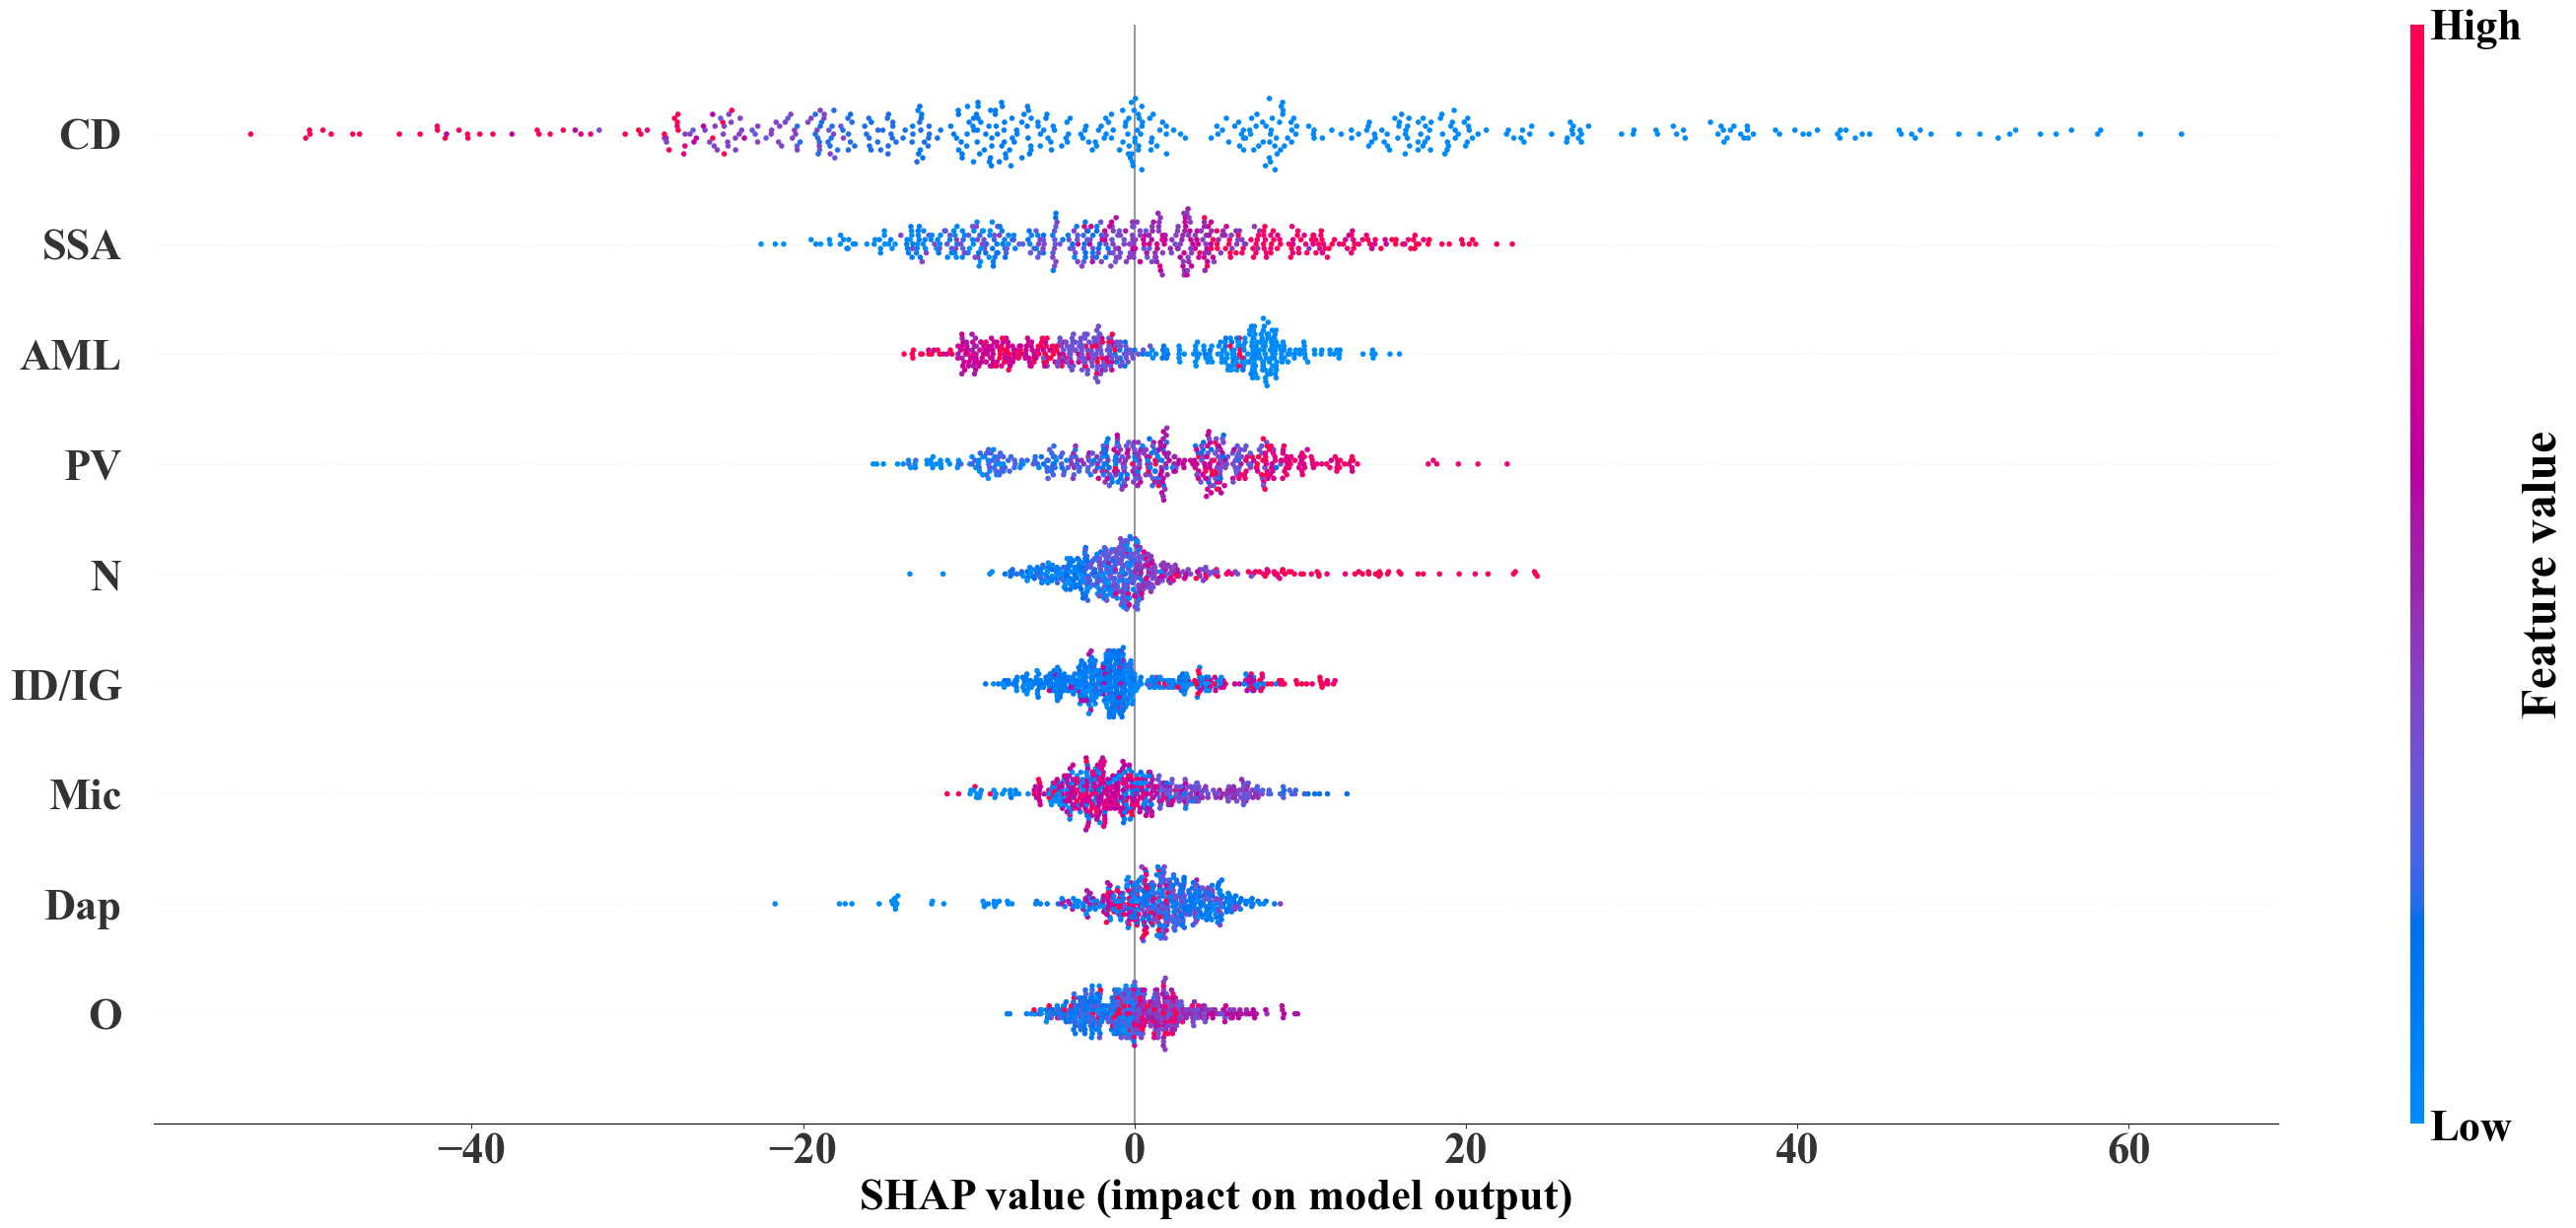

In [2]:
from xgboost import XGBRegressor
import shap
import matplotlib.pyplot as plt

xgb = XGBRegressor(n_estimators=80,
                   learning_rate=0.16,
                   subsample=0.5,
                   gamma=0.1,
                   max_depth=8,
                   min_child_weight=2,
                   reg_alpha=0.35,
                   colsample_bytree=0.7,
                   colsample_bylevel=1.0,
                   colsample_bynode=0.7,
                   random_state=21)
xgb.fit(X_train, y_train)

y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

explainer = shap.Explainer(xgb)
shap_values = explainer(X_train)

shap.summary_plot(shap_values, X_train, plot_type="bar", plot_size=(28, 12), max_display=9, show=False)
# 获取当前图形对象
fig = plt.gcf()

# 放大字体大小并更改字体为Times New Roman且加粗
for ax in fig.axes:
    ax.title.set_fontsize(48)  # 放大标题字体
    ax.title.set_fontweight('bold')  # 加粗标题字体
    ax.title.set_fontname('Times New Roman')  # 设置字体为 Times New Roman
    
    ax.xaxis.label.set_size(32)  # 放大 x 轴标签字体
    ax.xaxis.label.set_fontweight('bold')  # 加粗 x 轴标签字体
    ax.xaxis.label.set_fontname('Times New Roman')  # 设置字体为 Times New Roman
    
    ax.yaxis.label.set_size(36)  # 放大 y 轴标签字体
    ax.yaxis.label.set_fontweight('bold')  # 加粗 y 轴标签字体
    ax.yaxis.label.set_fontname('Times New Roman')  # 设置字体为 Times New Roman
    
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(32)  # 放大刻度标签字体
        label.set_fontweight('bold')  # 加粗刻度标签字体
        label.set_fontname('Times New Roman')  # 设置字体为 Times New Roman

plt.savefig('output/figures/shap_trainset_summary_bar.png', bbox_inches='tight', pad_inches=0.1, transparent=True, dpi=300)

# 清除当前图形
plt.clf()

shap.summary_plot(shap_values, X_train, plot_size=(28, 12), max_display=9, show=False)
# 获取当前图形对象
fig = plt.gcf()

# 放大字体大小
for ax in fig.axes:
    ax.title.set_fontsize(48)  # 放大标题字体
    ax.title.set_fontweight('bold')  # 加粗标题字体
    ax.title.set_fontname('Times New Roman')  # 设置字体为 Times New Roman
    
    ax.xaxis.label.set_size(32)  # 放大 x 轴标签字体
    ax.xaxis.label.set_fontweight('bold')  # 加粗 x 轴标签字体
    ax.xaxis.label.set_fontname('Times New Roman')  # 设置字体为 Times New Roman
    
    ax.yaxis.label.set_size(36)  # 放大 y 轴标签字体
    ax.yaxis.label.set_fontweight('bold')  # 加粗 y 轴标签字体
    ax.yaxis.label.set_fontname('Times New Roman')  # 设置字体为 Times New Roman
    
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(32)  # 放大刻度标签字体
        label.set_fontweight('bold')  # 加粗刻度标签字体
        label.set_fontname('Times New Roman')  # 设置字体为 Times New Roman
plt.savefig('output/figures/shap_trainset_summary.png', bbox_inches='tight', pad_inches=0.1, transparent=True, dpi=300)

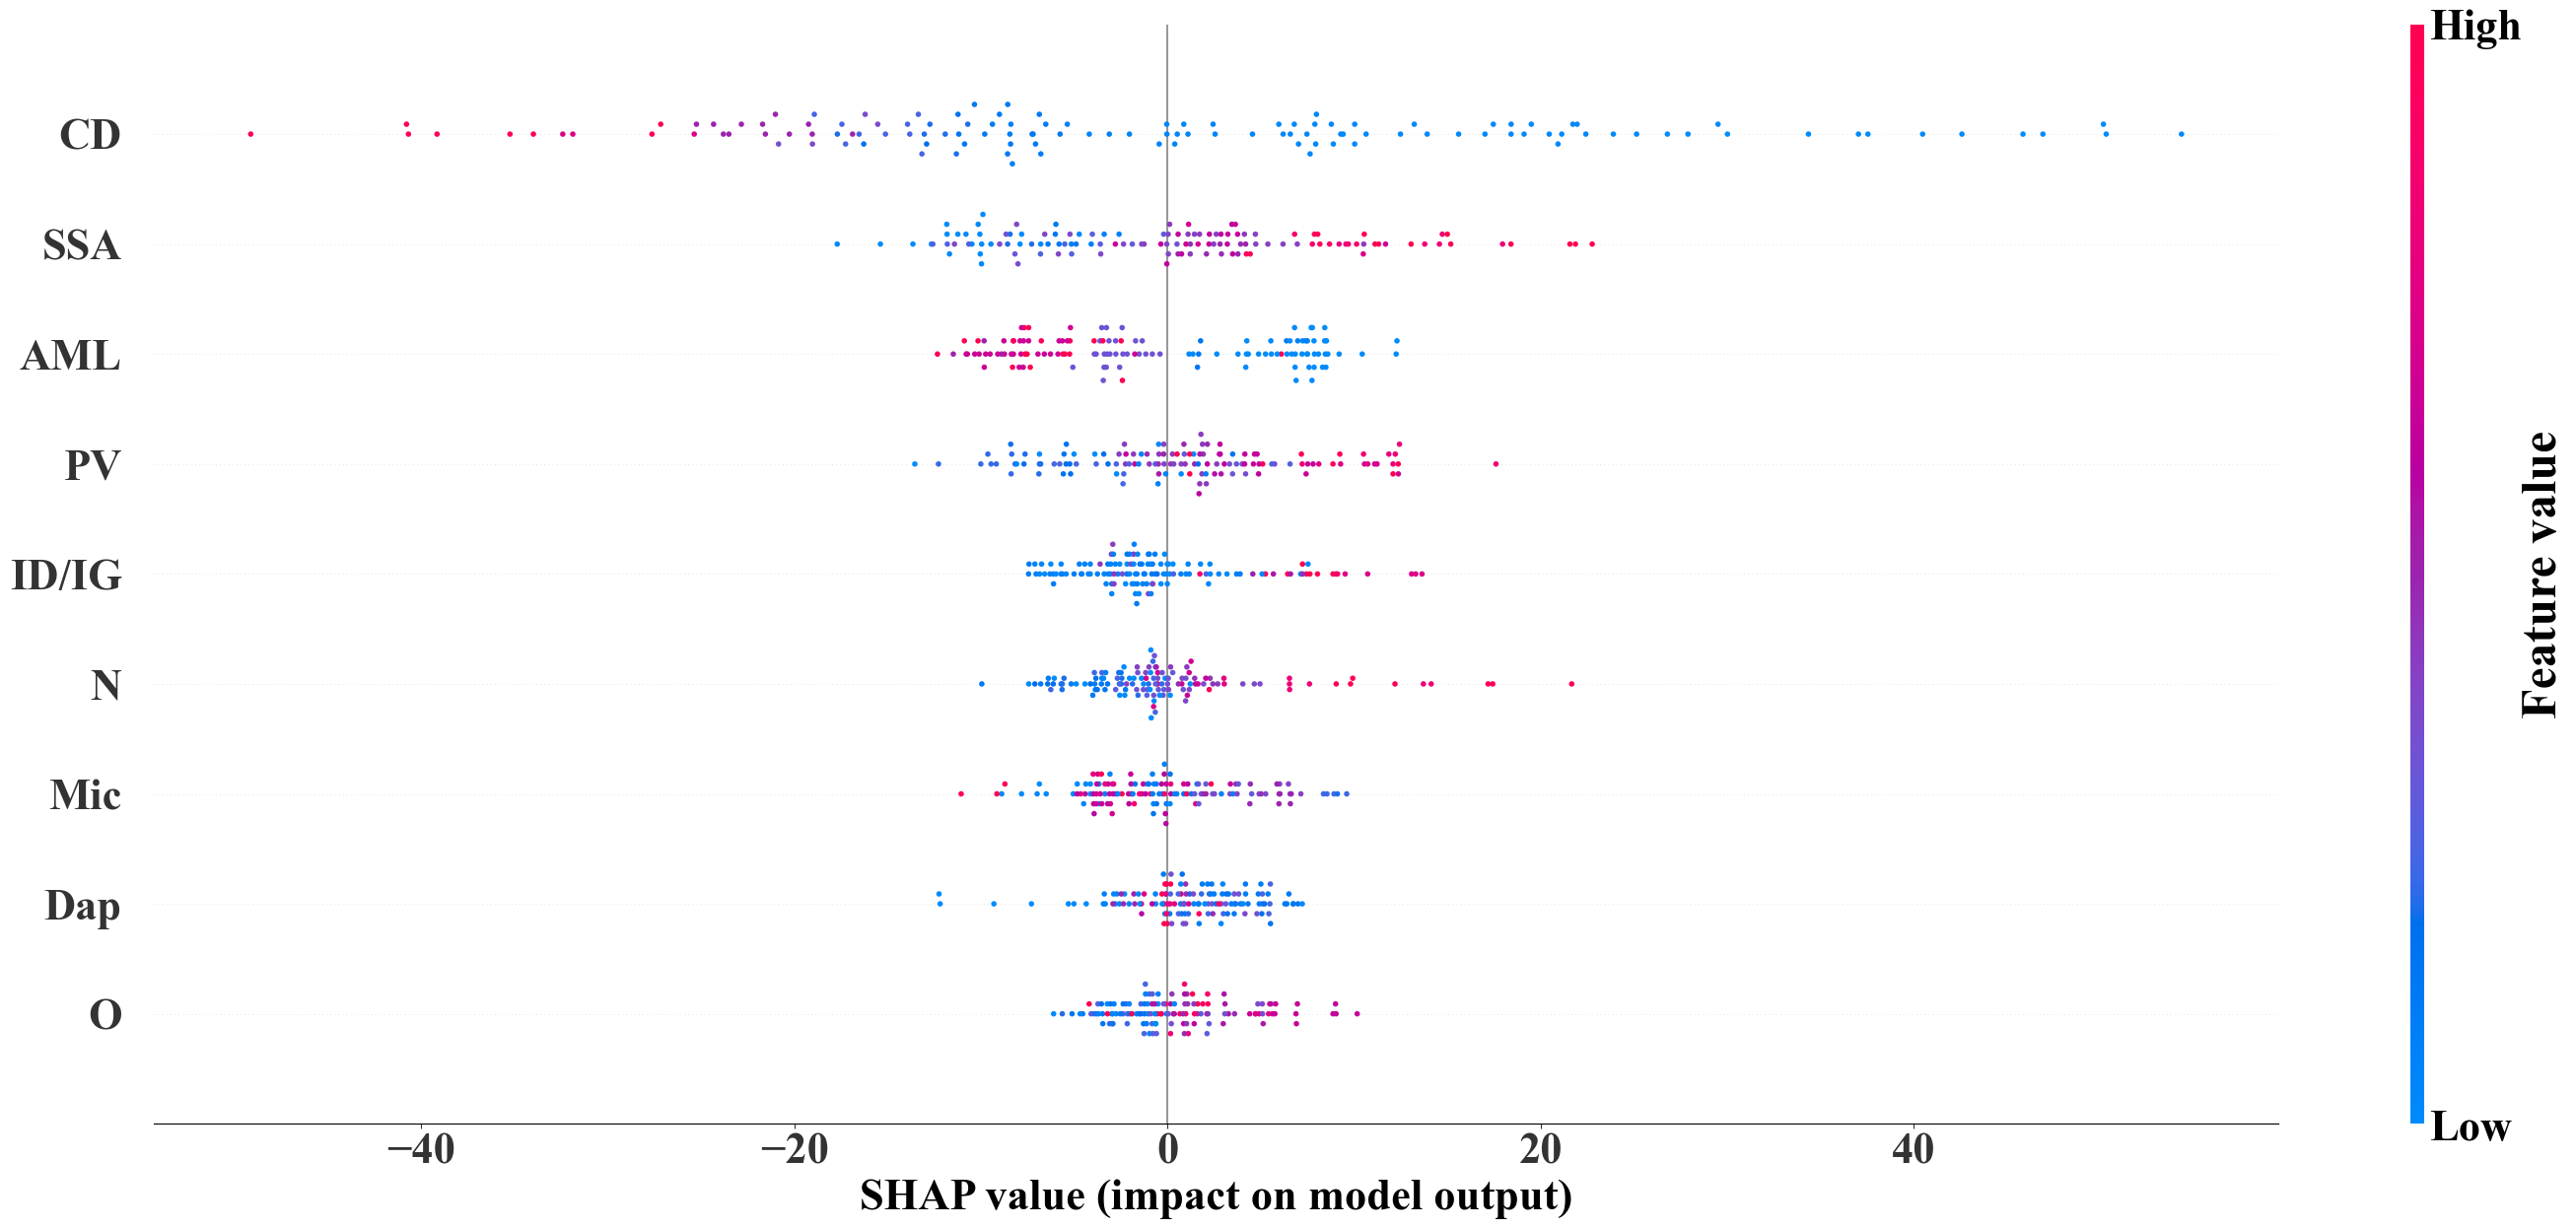

In [3]:
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar", plot_size=(28, 12), max_display=9, show=False)
# 获取当前图形对象
fig = plt.gcf()

for ax in fig.axes:
    ax.title.set_fontsize(48)  # 放大标题字体
    ax.title.set_fontweight('bold')  # 加粗标题字体
    ax.title.set_fontname('Times New Roman')  # 设置字体为 Times New Roman
    
    ax.xaxis.label.set_size(32)  # 放大 x 轴标签字体
    ax.xaxis.label.set_fontweight('bold')  # 加粗 x 轴标签字体
    ax.xaxis.label.set_fontname('Times New Roman')  # 设置字体为 Times New Roman
    
    ax.yaxis.label.set_size(36)  # 放大 y 轴标签字体
    ax.yaxis.label.set_fontweight('bold')  # 加粗 y 轴标签字体
    ax.yaxis.label.set_fontname('Times New Roman')  # 设置字体为 Times New Roman
    
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(32)  # 放大刻度标签字体
        label.set_fontweight('bold')  # 加粗刻度标签字体
        label.set_fontname('Times New Roman')  # 设置字体为 Times New Roman
plt.savefig('output/figures/shap_testset_summary_bar.png', bbox_inches='tight', pad_inches=0.1, transparent=True, dpi=300)

# 清除当前图形
plt.clf()

shap.summary_plot(shap_values, X_test, plot_size=(28, 12), max_display=9, show=False)
# 获取当前图形对象
fig = plt.gcf()

# 放大字体大小
for ax in fig.axes:
    ax.title.set_fontsize(48)  # 放大标题字体
    ax.title.set_fontweight('bold')  # 加粗标题字体
    ax.title.set_fontname('Times New Roman')  # 设置字体为 Times New Roman
    
    ax.xaxis.label.set_size(32)  # 放大 x 轴标签字体
    ax.xaxis.label.set_fontweight('bold')  # 加粗 x 轴标签字体
    ax.xaxis.label.set_fontname('Times New Roman')  # 设置字体为 Times New Roman
    
    ax.yaxis.label.set_size(36)  # 放大 y 轴标签字体
    ax.yaxis.label.set_fontweight('bold')  # 加粗 y 轴标签字体
    ax.yaxis.label.set_fontname('Times New Roman')  # 设置字体为 Times New Roman
    
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(32)  # 放大刻度标签字体
        label.set_fontweight('bold')  # 加粗刻度标签字体
        label.set_fontname('Times New Roman')  # 设置字体为 Times New Roman
plt.savefig('output/figures/shap_testset_summary.png', bbox_inches='tight', pad_inches=0.1, transparent=True, dpi=300)